In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

**1.Получите данные и загрузите их в рабочую среду.**

In [ ]:

data =fetch_california_housing()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
X = data.data
features = data.feature_names
y = data.target

In [ ]:
df = pd.DataFrame(X, columns=features)
df['target'] = y

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

**2.Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.**

In [ ]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

**3.Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4.Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве**.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train) # метод фит - метод обучения модели

LinearRegression()

In [ ]:
pred = model.predict(X_test)

In [ ]:
print(y_test)

[0.477   0.458   5.00001 ... 5.00001 0.723   1.515  ]


In [ ]:
print(pred)

[3.33660452 2.81473083 1.05668376 ... 3.02689658 2.45489148 1.00911835]


In [ ]:
pred_df = pd.DataFrame({
    'target':y_test,
    'prediction': pred
})

pred_df

,target,prediction
0,0.47700,0.719123
1,0.45800,1.764017
2,5.00001,2.709659
3,2.18600,2.838926
4,2.78000,2.604657
...,...,...
4123,2.63300,1.991746
4124,2.66800,2.249839
4125,5.00001,4.468770
4126,0.72300,1.187511


In [ ]:
pred_df['difference'] = pred_df['prediction'] - pred_df['target']
pred_df

,target,prediction,difference
0,0.47700,0.719123,0.242123
1,0.45800,1.764017,1.306017
2,5.00001,2.709659,-2.290351
3,2.18600,2.838926,0.652926
4,2.78000,2.604657,-0.175343
...,...,...,...
4123,2.63300,1.991746,-0.641254
4124,2.66800,2.249839,-0.418161
4125,5.00001,4.468770,-0.531240
4126,0.72300,1.187511,0.464511


In [ ]:
metrics.mean_absolute_error(y_test, pred)

0.5332001304956976

### RMSE

In [ ]:
np.sqrt(mean_squared_error(pred_df['target'], pred_df['prediction']))

0.7455813830127749

### $R^2$

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(pred_df['target'], pred_df['prediction'])

0.5757877060324524

**5.Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?**

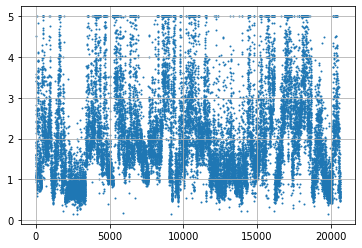

In [ ]:
plt.scatter (df.index,df['target'],  s=1)

plt.grid()

**6.Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.**

a. Сделайте выводы.

b. Удалите признаки на основании полученных значений, выводов.

c. Повторите п. 3, п. 4 на измененных данных.

In [ ]:
df.corr()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


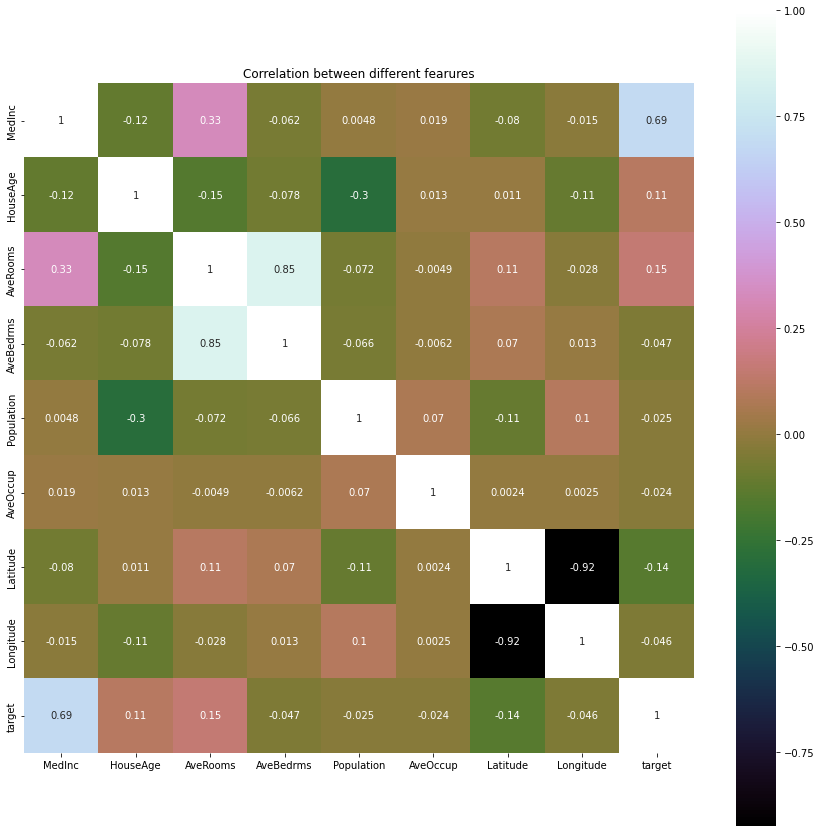

In [ ]:
correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')
plt.show()

In [ ]:
df_f = df.drop(['Latitude','Longitude'], axis=1)

In [ ]:
df_f

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


In [ ]:
X1=df_f.drop('target', axis=1)
y1=df_f['target']


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X1_train, y1_train)

LinearRegression()

In [ ]:
pred1 = model.predict(X1_test)

In [ ]:
pred1_df = pd.DataFrame({
    'target':y1_test,
    'prediction': pred1
})

pred1_df

,target,prediction
20046,0.47700,1.001005
3024,0.45800,1.560056
15663,5.00001,2.677133
20484,2.18600,2.647633
9814,2.78000,1.982300
...,...,...
15362,2.63300,1.869894
16623,2.66800,1.462591
18086,5.00001,4.367528
2144,0.72300,1.501368


In [ ]:
np.sqrt(mean_squared_error(pred1_df['target'], pred1_df['prediction']))

0.8013658536857475

In [ ]:
r2_score(pred1_df['target'], pred1_df['prediction'])

0.5099337366296416

**7.Исследуйте оставленные признаки на выбросы.**

a. Удалите выбросы в случае обнаружения.

b. Повторите п. 3, п. 4 на измененных данных.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


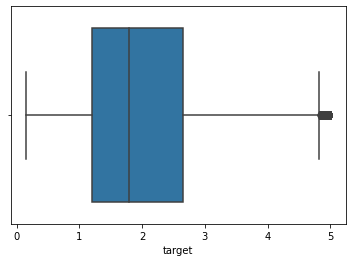

In [ ]:
import seaborn as sns
sns.boxplot(df_f['target'])


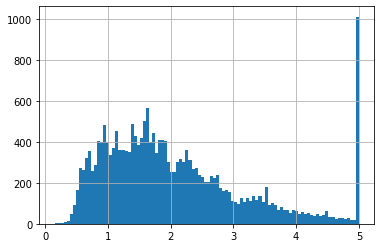

In [ ]:
df_f['target'].hist(bins=100)
plt.show()

In [ ]:
df_f

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


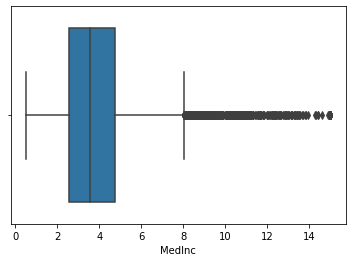

In [ ]:
sns.boxplot(df_f['MedInc'])

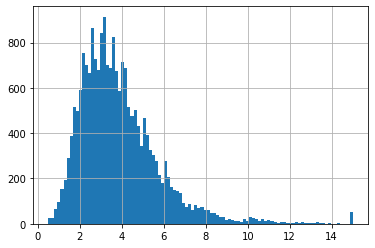

In [ ]:
df['MedInc'].hist(bins=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


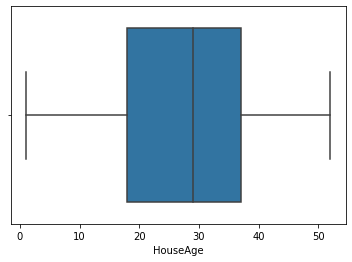

In [ ]:
sns.boxplot(df_f['HouseAge'])

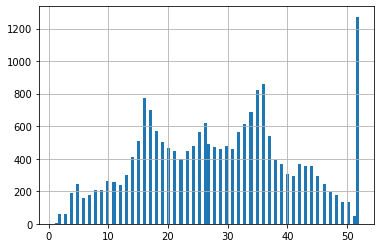

In [ ]:
df_f['HouseAge'].hist(bins=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


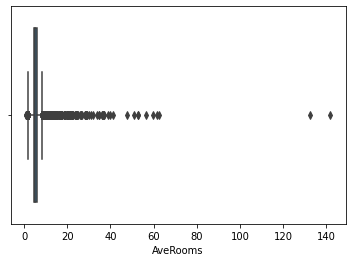

In [ ]:
sns.boxplot(df_f['AveRooms'])

In [ ]:
df_f[df_f['AveRooms'] > 100]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,1.62500


In [ ]:
df_f = df_f[(df_f['AveRooms'] < 100) | (df_f['AveRooms'].isna())]
df_f[df_f['AveRooms'] > 100]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


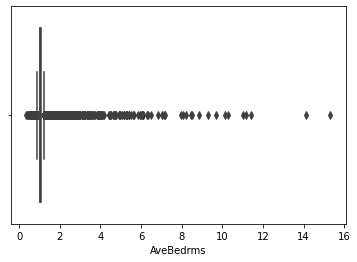

In [ ]:
sns.boxplot(df_f['AveBedrms'])

In [ ]:
df_f[df_f['AveBedrms'] > 12]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target
11862,2.6250,25.0,59.875000,15.312500,28.0,1.750000,0.675
12447,1.6154,17.0,62.422222,14.111111,83.0,1.844444,0.875


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


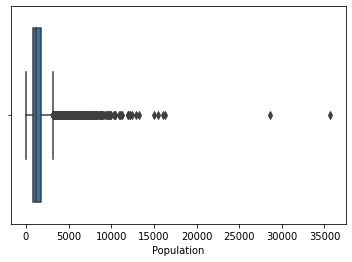

In [ ]:
sns.boxplot(df_f['Population'])

In [ ]:
df_f[df_f['Population'] > 25000]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target
9880,2.3087,11.0,5.364518,1.059684,28566.0,4.696810,1.188
15360,2.5729,14.0,5.270497,1.010484,35682.0,7.482072,1.344


In [ ]:
df_f =df_f[(df_f['Population'] < 25000) | (df_f['Population'].isna())]
df_f[df_f['Population'] > 25000]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


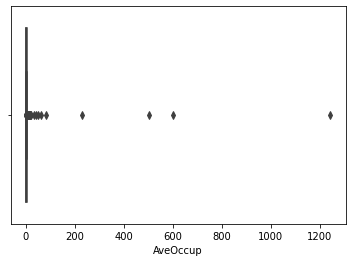

In [ ]:
sns.boxplot(df_f['AveOccup'])

In [ ]:
df_f[df_f['AveOccup'] > 600]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,1.375


In [ ]:
df_f = df_f[(df_f['AveOccup'] < 600) | (df_f['AveOccup'].isna())]
df_f[df_f['AveOccup'] > 600]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target


In [ ]:
X2 = df_f.drop(['target'], axis=1)

In [ ]:
y2= df_f['target']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X2_train, y2_train)

LinearRegression()

In [ ]:
pred2 = model.predict(X2_test)

In [ ]:
pred2_df = pd.DataFrame({
    'target':y2_test,
    'prediction': pred2
})

pred2_df

,target,prediction
20046,0.47700,0.998300
3024,0.45800,1.565823
12116,1.63300,2.066287
20484,2.18600,2.643724
9814,2.78000,1.983697
...,...,...
18293,5.00001,3.227342
16622,2.26900,1.260468
18085,4.55500,3.927644
2144,0.72300,1.500926


In [ ]:
np.sqrt(mean_squared_error(pred2_df['target'], pred2_df['prediction']))

0.8004748955512752

In [ ]:
r2_score(pred2_df['target'], pred2_df['prediction'])

0.5040145727301975